In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from fbprophet import Prophet

# Recovery and Infection Rate prediction in India

In [286]:
df_india=pd.read_csv('/Users/bhavyachhabra/Desktop/covid_19_india.csv')
df_india['Recovery Rate'] = df_india['Recovered']/df_india['Confirmed']*100
df_india.tail()

,Date,Confirmed,Recovered,Deaths,Infection Rate,Recovery Rate
98,6/10/2020,11156,6275,358,10.532449,56.247759
99,6/11/2020,11135,6044,394,-0.188595,54.279300
100,6/12/2020,11306,7263,388,1.512471,64.240226
101,6/13/2020,12039,8092,309,6.088546,67.214885
102,6/14/2020,11374,7362,321,-5.846668,64.726569


In [287]:
infectionRate=df_india[['Date','Infection Rate']]
recoveryRate=df_india[['Date','Recovery Rate']]

In [288]:
infectionRate.columns=['ds','y']
infectionRate['ds']=pd.to_datetime(infectionRate['ds'])

In [404]:
m=Prophet()
m.fit(infectionRate)
future=m.make_future_dataframe(periods=47)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [290]:
forecast1=m.predict(future)
df_india = pd.concat([df, forecast1['yhat']], axis=1)
df_india.rename(columns={'yhat': 'Perdicted Infection Rate',},inplace=True)
forecast1[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
145,2020-07-27,34.568710,-86.912634,159.098227
146,2020-07-28,40.104688,-92.591521,159.559477
147,2020-07-29,36.511733,-94.021018,170.128657
148,2020-07-30,-28.379289,-156.139743,107.900174
149,2020-07-31,33.555288,-93.557900,162.124342


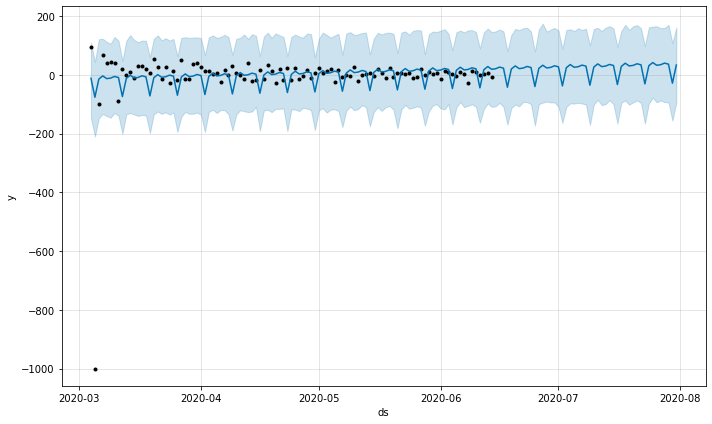

In [291]:
infRate=m.plot(forecast1)

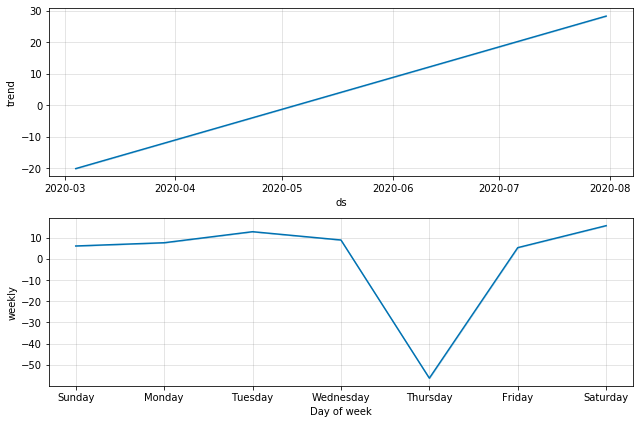

In [292]:
infRate_forecast_plot=m.plot_components(forecast1)

In [293]:
recoveryRate.columns=['ds','y']
recoveryRate['ds']=pd.to_datetime(recoveryRate['ds'])

In [294]:
m=Prophet()
m.fit(recoveryRate)
future=m.make_future_dataframe(periods=47)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
145,2020-07-27
146,2020-07-28
147,2020-07-29
148,2020-07-30
149,2020-07-31


In [295]:
forecast2=m.predict(future)
df_india = pd.concat([df, forecast2['yhat']], axis=1)
df_india.rename(columns={'yhat': 'Perdicted Recovery Rate',},inplace=True)
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
140,2020-07-22,85.124423,68.980987,103.096002
141,2020-07-23,86.678447,70.977717,103.005191
142,2020-07-24,99.434768,83.924590,115.217858
143,2020-07-25,89.761987,73.762548,106.163356
144,2020-07-26,89.618241,72.246882,104.744181
145,2020-07-27,90.108989,73.721957,105.606156
146,2020-07-28,93.889273,78.808355,109.643053
147,2020-07-29,89.646269,73.585295,104.310792
148,2020-07-30,91.200293,74.458923,106.989355
149,2020-07-31,103.956615,87.871819,120.387496


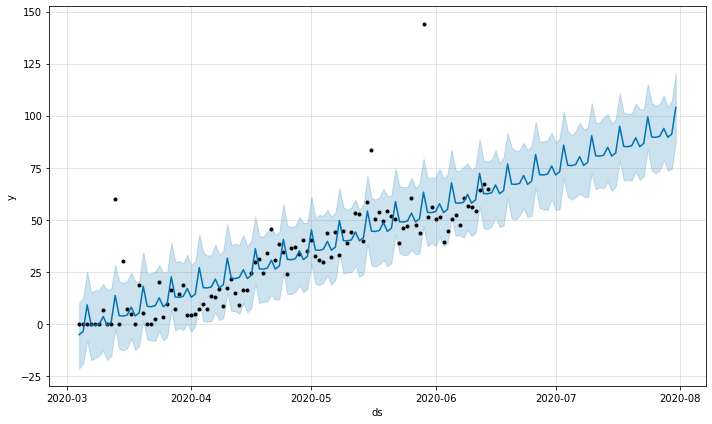

In [296]:
recRate=m.plot(forecast2)

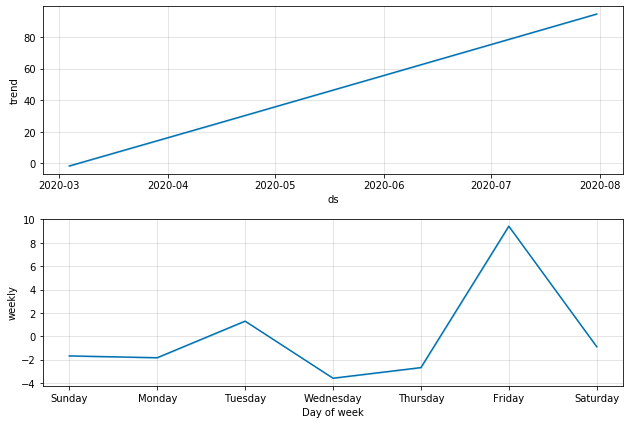

In [297]:
infRate_forecast_plot=m.plot_components(forecast2)

In [312]:
df_india

,Date,confirmed_cases,Deceased,Infection Rate,Perdicted Recovery Rate
0,3/23/20,5834.0,18.0,0.000000,-5.163247
1,3/24/20,6376.0,18.0,8.500627,-3.614415
2,3/25/20,6760.0,20.0,5.680473,9.136716
3,3/26/20,10090.0,38.0,33.002973,-0.541257
4,3/27/20,10484.0,38.0,3.758108,-0.690195
5,3/28/20,11102.0,38.0,5.566565,-0.204638
6,3/29/20,15460.0,70.0,28.188875,3.570455
7,3/30/20,15926.0,72.0,2.926033,-0.677741
8,3/31/20,16984.0,86.0,6.229392,0.871091
9,4/1/20,17156.0,88.0,1.002565,13.622222


# Various predictions Age-wise - Spain - 40 to 49 years

In [409]:
df=pd.read_csv('/Users/bhavyachhabra/Desktop/spain.csv',parse_dates=True)
df=df[df.age_group='40-49']
df=df.groupby(by='date')['confirmed_cases','Deceased','Infection Rate'].sum().reset_index()
df['Death Rate']=df['Deceased']/df['confirmed_cases']*100
df.tail()

,Date,confirmed_cases,Deceased,Infection Rate,Death Rate
51,5/13/20,69616,400,0.043094,0.574581
52,5/14/20,70350,402,1.043355,0.571429
53,5/15/20,70372,402,0.031262,0.571250
54,5/16/20,70234,402,-0.196486,0.572372
55,5/17/20,70234,402,0.000000,0.572372


In [411]:
df_india.tail()

,date,new_cases
161,2020-06-10,9985.0
162,2020-06-11,9996.0
163,2020-06-12,10956.0
164,2020-06-13,11458.0
165,2020-06-14,11929.0


In [300]:
infectionRate=df[['Date','Infection Rate']]
deathRate=df[['Date','Death Rate']]

In [301]:
deathRate.columns=['ds','y']
deathRate['ds']=pd.to_datetime(deathRate['ds'])

In [302]:
m=Prophet()
m.fit(deathRate)
future=m.make_future_dataframe(periods=75)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-07-27
127,2020-07-28
128,2020-07-29
129,2020-07-30
130,2020-07-31


We can see that model is perdicted till 31st of July

In [303]:
forecast1=m.predict(future)
df = pd.concat([df, forecast1['yhat']], axis=1)
df.rename(columns={'yhat': 'Perdicted Death Rate'},inplace=True)
forecast1[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
121,2020-07-22,0.611806,0.473331,0.744071
122,2020-07-23,0.612860,0.475745,0.746836
123,2020-07-24,0.606387,0.468133,0.747451
124,2020-07-25,0.600240,0.455375,0.746241
125,2020-07-26,0.640271,0.504313,0.781308
126,2020-07-27,0.624046,0.473728,0.771838
127,2020-07-28,0.623622,0.471217,0.762573
128,2020-07-29,0.614519,0.465104,0.775665
129,2020-07-30,0.615574,0.468248,0.762197
130,2020-07-31,0.609100,0.452792,0.765223


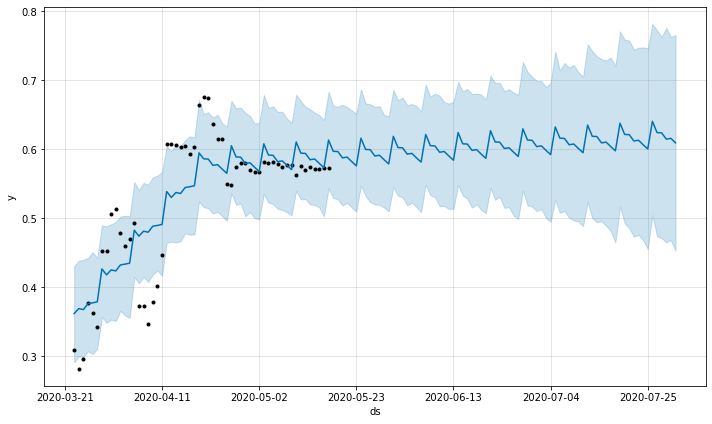

In [304]:
confirmed=m.plot(forecast1)

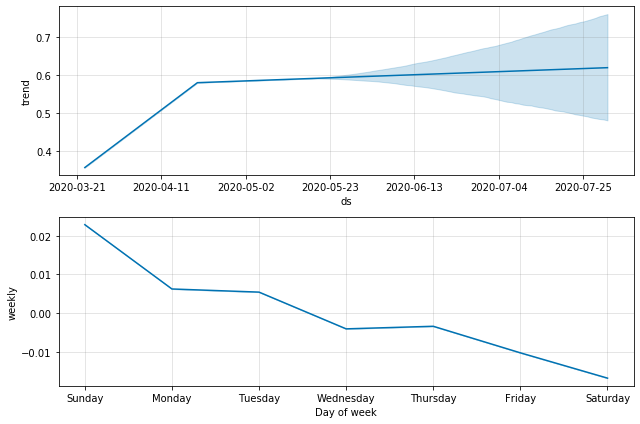

In [305]:
confirmed_forecast_plot=m.plot_components(forecast1)

In [306]:
infectionRate.columns=['ds','y']
infectionRate['ds']=pd.to_datetime(infectionRate['ds'])

In [307]:
m=Prophet()
m.fit(infectionRate)
future=m.make_future_dataframe(periods=75)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-07-27
127,2020-07-28
128,2020-07-29
129,2020-07-30
130,2020-07-31


In [308]:
forecast2=m.predict(future)
df = pd.concat([df, forecast2['yhat']], axis=1)
df.rename(columns={'yhat': 'Perdicted Infection Rate',},inplace=True)
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
121,2020-07-22,-15.760012,-22.392195,-8.864386
122,2020-07-23,-9.672038,-16.565627,-2.685406
123,2020-07-24,-17.343697,-24.331082,-10.030061
124,2020-07-25,-15.152497,-21.954000,-7.837168
125,2020-07-26,-10.876861,-17.922713,-3.988864
126,2020-07-27,-18.051911,-24.845535,-11.741171
127,2020-07-28,-17.941021,-24.802768,-11.205829
128,2020-07-29,-17.139102,-24.098290,-10.191889
129,2020-07-30,-11.051128,-17.933694,-4.459285
130,2020-07-31,-18.722787,-25.507245,-11.547055


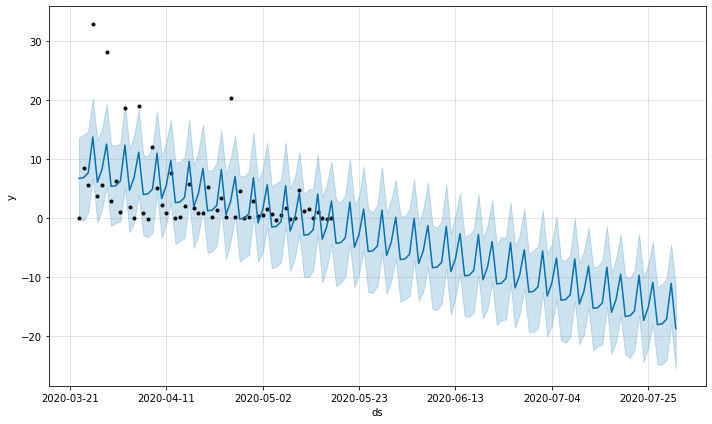

In [309]:
infRate=m.plot(forecast2)

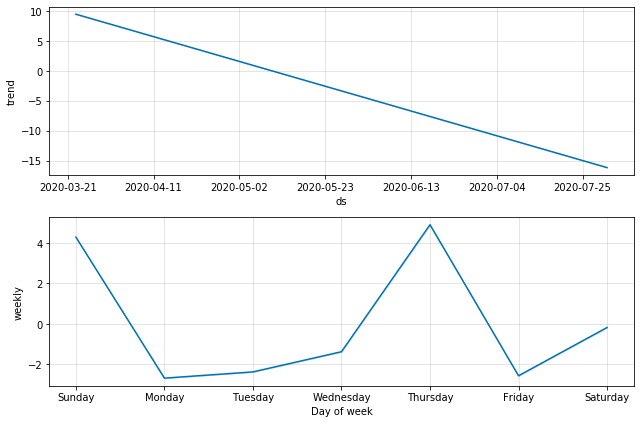

In [310]:
infRate_forecast_plot=m.plot_components(forecast2)

In [311]:
df

,Date,confirmed_cases,Deceased,Infection Rate,Death Rate,Perdicted Death Rate,Perdicted Infection Rate
0,3/23/20,5834.0,18.0,0.000000,0.308536,0.361952,6.771716
1,3/24/20,6376.0,18.0,8.500627,0.282309,0.369145,6.882606
2,3/25/20,6760.0,20.0,5.680473,0.295858,0.367659,7.684525
3,3/26/20,10090.0,38.0,33.002973,0.376611,0.376331,13.772498
4,3/27/20,10484.0,38.0,3.758108,0.362457,0.377475,6.100840
5,3/28/20,11102.0,38.0,5.566565,0.342281,0.378944,8.292040
6,3/29/20,15460.0,70.0,28.188875,0.452781,0.426592,12.567676
7,3/30/20,15926.0,72.0,2.926033,0.452091,0.417984,5.392625
8,3/31/20,16984.0,86.0,6.229392,0.506359,0.425177,5.503515
9,4/1/20,17156.0,88.0,1.002565,0.512940,0.423691,6.305434


# Using linear regression model to predict peak in Indian Graph

In [413]:
df_world=pd.read_csv('/Users/bhavyachhabra/Downloads/convertcsv-2.csv')
df_spain=df_world.query('location=="Spain"').groupby('date')[['new_cases']].sum().reset_index()
df_india=df_world.query('location=="India"').groupby('date')[['new_cases']].sum().reset_index()

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [352]:
x_train,x_test,y_train,y_test=train_test_split(df_spain['new_cases'],df_india['new_cases'],test_size=0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [346]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(r2_score(y_test,y_pred))

-0.026545313743205456


# as we can see, our model doesnot fitted because of inappropriate curve

# so lets divide spain's and india's data to see if that fitted

In [371]:
df_india_compact=pd.read_csv('/Users/bhavyachhabra/Desktop/complete_india_data_compatct_34days.csv')
df_spain_while_increasing=pd.read_csv('/Users/bhavyachhabra/Desktop/spain_cases_while-increasing.csv')
df_india_compact.tail()

,Unnamed: 0,date,new_cases,Unnamed: 3
28,30,2020-05-29,7466.0,0
29,31,2020-06-02,8171.0,1
30,32,2020-06-06,9887.0,0
31,33,2020-06-10,9985.0,1
32,34,2020-06-14,11929.0,0


In [372]:
df_spain_while_increasing.tail()

,Unnamed: 0,date,new_cases
28,84,2020-03-24,7691.0
29,85,2020-03-25,8553.0
30,86,2020-03-26,8954.0
31,87,2020-03-27,9181.0
32,88,2020-03-28,8244.0


In [373]:
x_train,x_test,y_train,y_test=train_test_split(df_spain_while_increasing['new_cases'],df_india_compact['new_cases'],test_size=0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [374]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(r2_score(y_test,y_pred))

0.9676398831437184


# so this finally results good. Lets try to compact more.

In [375]:
df_india_compact2=pd.read_csv('/Users/bhavyachhabra/Desktop/india_cases_compact1.csv')
df_spain_while_increasing2=pd.read_csv('/Users/bhavyachhabra/Desktop/spain_cases_compact_29.csv')
df_india_compact2.tail()

,date,new_cases
23,2020-05-29,7466.0
24,2020-06-02,8171.0
25,2020-06-06,9887.0
26,2020-06-10,9985.0
27,2020-06-14,11929.0


In [376]:
df_spain_while_increasing2.tail()

,Unnamed: 0,date,new_cases
23,79,2020-03-19,4047.0
24,80,2020-03-20,4569.0
25,81,2020-03-21,5446.0
26,82,2020-03-22,4866.0
27,83,2020-03-23,4646.0


In [377]:
x_train,x_test,y_train,y_test=train_test_split(df_spain_while_increasing2['new_cases'],df_india_compact2['new_cases'],test_size=0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [378]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(r2_score(y_test,y_pred))

0.977998305077768


# r2 obtained by furthur compacting some data...lets predict now

In [380]:
df_spain_after_using_for_testing=pd.read_csv('/Users/bhavyachhabra/Desktop/spain_cases_after_23.csv')

In [382]:
df_spain_after_using_for_testing.head()

,Unnamed: 0,date,new_cases
0,84,2020-03-24,7691.0
1,85,2020-03-25,8553.0
2,86,2020-03-26,8954.0
3,87,2020-03-27,9181.0
4,88,2020-03-28,8244.0


In [386]:
x_test = df_spain_after_using_for_testing['new_cases']
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred=clf.predict(x_test)

In [388]:
y_pred

array([15621.17083236, 17356.79017828, 18164.19546565, 18621.25531661,
       16734.62500671, 13070.09228099, 11839.8562945 , 16535.29053427,
       15061.4235259 , 15403.71504424, 14777.52291364, 13551.31388618,
       11276.082029  ,  7518.92924538, 10623.71466464, 11376.75600498,
       11702.93968716,  9270.65642745,  9296.83166121,  7986.05649393,
        6236.34279137,  6409.50203006,  9043.13324173,  7826.99161188,
        7822.96465284,  7859.20728419, -1300.1110506 ,  4601.39742143,
        6077.27790932,  4790.66449628,  6006.80612614,  4391.99555139,
        5181.27952309,  3439.61973861,  3477.87584948,  3206.05611433,
        1840.91700002,  2634.22793076,  2928.19594062,  2620.13357412,
        2018.10319775,  1073.78130305,  2227.50506779,  1907.36182417,
        1989.91448448,  2497.31132342,  1631.51512998,  7013.54588595,
         926.79729811,  1105.99697536,  1019.41735602,  1844.94395906,
        1430.16717802,  1172.44179951,  1448.2884937 ,   650.95060392,
      

In [395]:
dataset = pd.DataFrame({'Column1': y_pred})

In [415]:
df_india=pd.read_csv('/Users/bhavyachhabra/Downloads/Untitled spreadsheet - Sheet1.csv')
df_india

,Unnamed: 0,date,new_cases
0,0,2019-12-31,0.000000
1,1,2020-01-01,0.000000
2,2,2020-01-02,0.000000
3,3,2020-01-03,0.000000
4,4,2020-01-04,0.000000
5,5,2020-01-05,0.000000
6,6,2020-01-06,0.000000
7,7,2020-01-07,0.000000
8,8,2020-01-08,0.000000
9,9,2020-01-09,0.000000


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

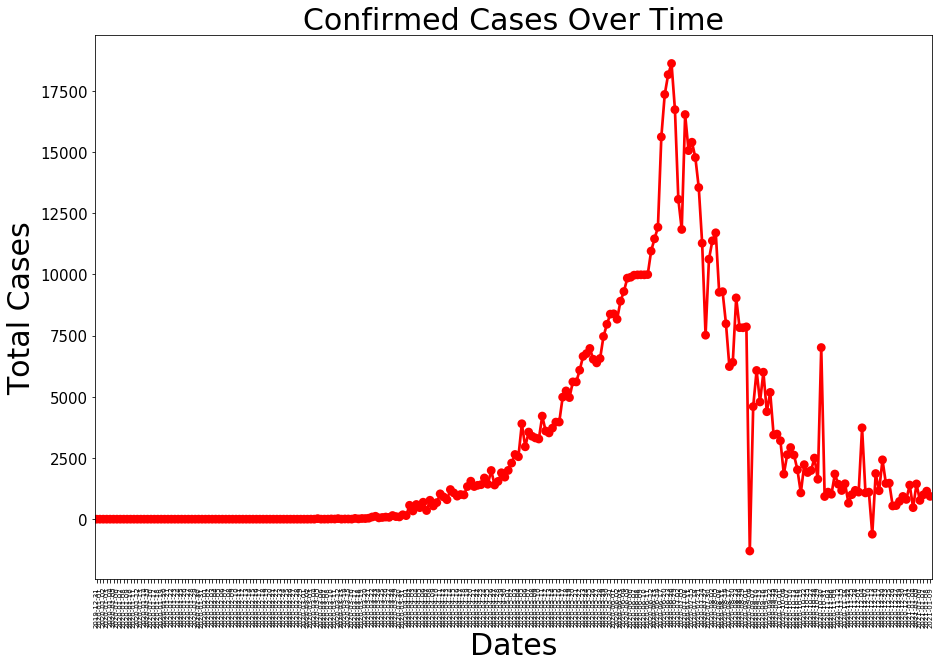

In [403]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Confirmed Cases Over Time', fontsize=30)
total_cases=df_india.groupby('date')['date','new_cases'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date,y=total_cases.new_cases,color='r')
ax.set(xlabel='Dates',ylabel='Total Cases')

In [416]:
peak=df_india['new_cases'].max()

18621.25532

In [402]:
peak*25//100

4655.0

# We met with this peak on dates around 7th of September 2020